In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk
nltk.download('popular')
nltk.download('vader_lexicon')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\prana\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\prana\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\prana\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\prana\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\prana\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

True

In [2]:
df=pd.read_csv("Reviews.csv")

We limit the amount of test data as the dataset is very large. 

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.shape

df=df.head(10000)

## Quick EDA



Text(0.5, 0, 'Review Stars')

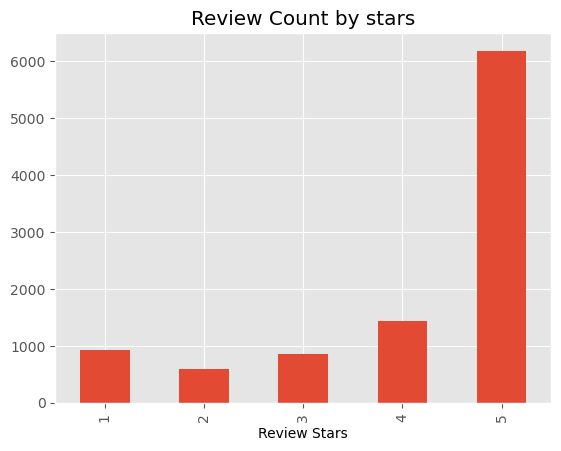

In [5]:
ax=df["Score"].value_counts().sort_index().plot(
    kind='bar',
    title="Review Count by stars")
ax.set_xlabel("Review Stars")

## Basic NLTK 

In [6]:
example=df['Text'][50]
example

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [7]:
tokens=nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [8]:
tagged=nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

## VADER Scoring 

In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia= SentimentIntensityAnalyzer()

In [10]:
sia.polarity_scores("I am so sick")
#example model 

{'neg': 0.642, 'neu': 0.358, 'pos': 0.0, 'compound': -0.5563}

In [11]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [12]:
#Running the polarity score on the entire dataset. 
#making a dictionary

res={}
for i,row in tqdm(df.iterrows(),total=len(df)):
    text=row['Text']
    i=row['Id']
    res[i]=sia.polarity_scores(text)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [13]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [14]:
#.t is used for tranpose of the matrix 
vaders=pd.DataFrame(res).T
vaders=vaders.reset_index().rename(columns={'index':'ID'})
vaders=pd.merge(vaders,df,how='left',left_index=True,right_index=True)
# using the index values of the dataframes 


In [15]:
#we have the sentiment score and user reviews together. 
vaders.head()

,ID,neg,neu,pos,compound,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


5 Star reviews will have more positive values from sentiment intensity analyser rather than the plots having 1 star reviews.

## Plotting VADER Results 

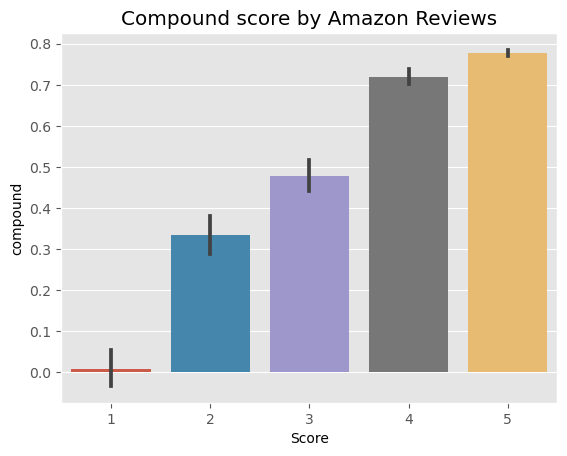

In [16]:
ax=sns.barplot(data=vaders, x="Score",y="compound")
ax.set_title("Compound score by Amazon Reviews")
plt.show()

<Axes: xlabel='Score', ylabel='pos'>

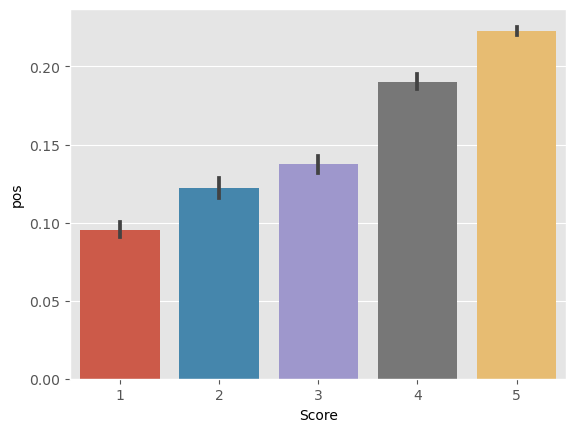

In [17]:
sns.barplot(data=vaders, x='Score',y='pos')

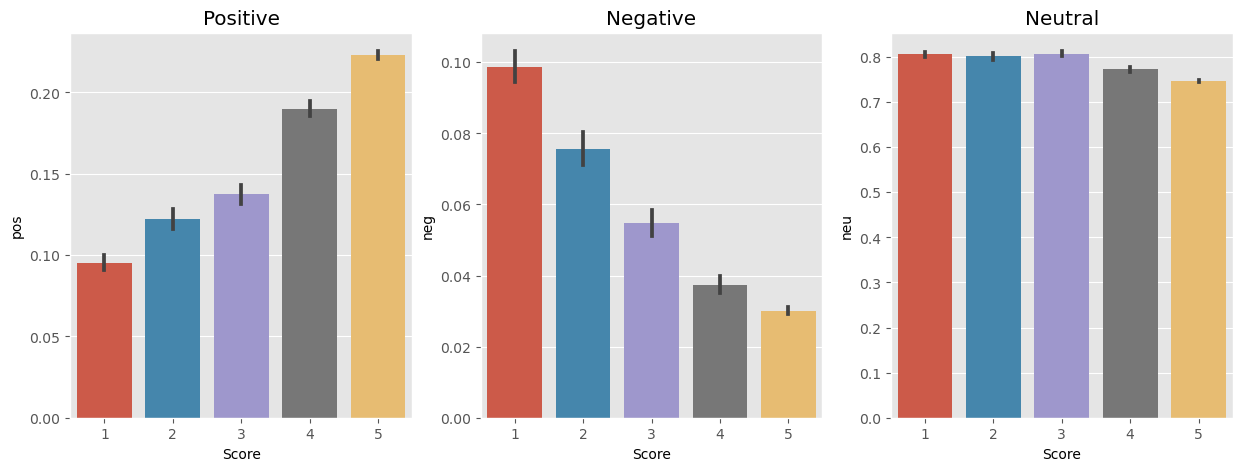

In [18]:
fig,axs=plt.subplots(1,3,figsize=(15,5))
sns.barplot(data=vaders, x='Score',y='pos',ax=axs[0])
sns.barplot(data=vaders, x='Score',y='neg',ax=axs[1])
sns.barplot(data=vaders, x='Score',y='neu',ax=axs[2])
axs[0].set_title("Positive")
axs[1].set_title("Negative")
axs[2].set_title("Neutral")
plt.show()

VADER is valuable in relating to the score of the SIA and the rating reviews. We checked the weightage of each word in the review and take the overall feedback of the review


In [19]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax 

We will implement the softmax regression algorithm on the outputs of the transformers output which consider a more deep learned model of the NLP english language and keep up with the more advanced language model present in the reviews which the Sentiment Analyzer might have missed. 


In [20]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [21]:
#VADER results on example with SIA
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [23]:
#Running them on the ROBERTA model
#making a function out of this 
def polarity_scores_roberta(example):
    encoded_text=tokenizer(example,return_tensors='pt')
    output=model(**encoded_text)
    scores= output[0][0].detach().numpy()
    scores=softmax(scores)
    scores_dict={
        'roberta_neg':scores[0],
        'roberta_neu':scores[1],
        'roberta_pos':scores[2]
}
    return scores_dict 

In [34]:
res={}
for i,row in tqdm(df.iterrows(),total=150):
   #try and except statement used to fix the incompatibility of the roberta models with very large texts
    try: 
        text=row['Text']
        i=row['Id']
        vader_result=sia.polarity_scores(text)
        #renaming the neu,neg, and pos to  vader results 

        vader_result_rename={}
        for key,value in vader_result.items():
            vader_result_rename[f"vader_{key}"]= value
        roberta_result= polarity_scores_roberta(text)

        #combining the two dictionaries 
        both= vader_result_rename|roberta_result
        res[i]=both 
    except RuntimeError:
        print(f'Broke for Test Case{i}')

  0%|          | 0/150 [00:00<?, ?it/s]

Broke for Test Case83
Broke for Test Case187


KeyboardInterrupt: 

In [37]:
results_df=pd.DataFrame(res).T
results_df=results_df.reset_index().rename(columns={'index':'ID'})
results_df=results_df.merge(df,how='left',left_index=True,right_index=True)

## Comparing the scores between the models



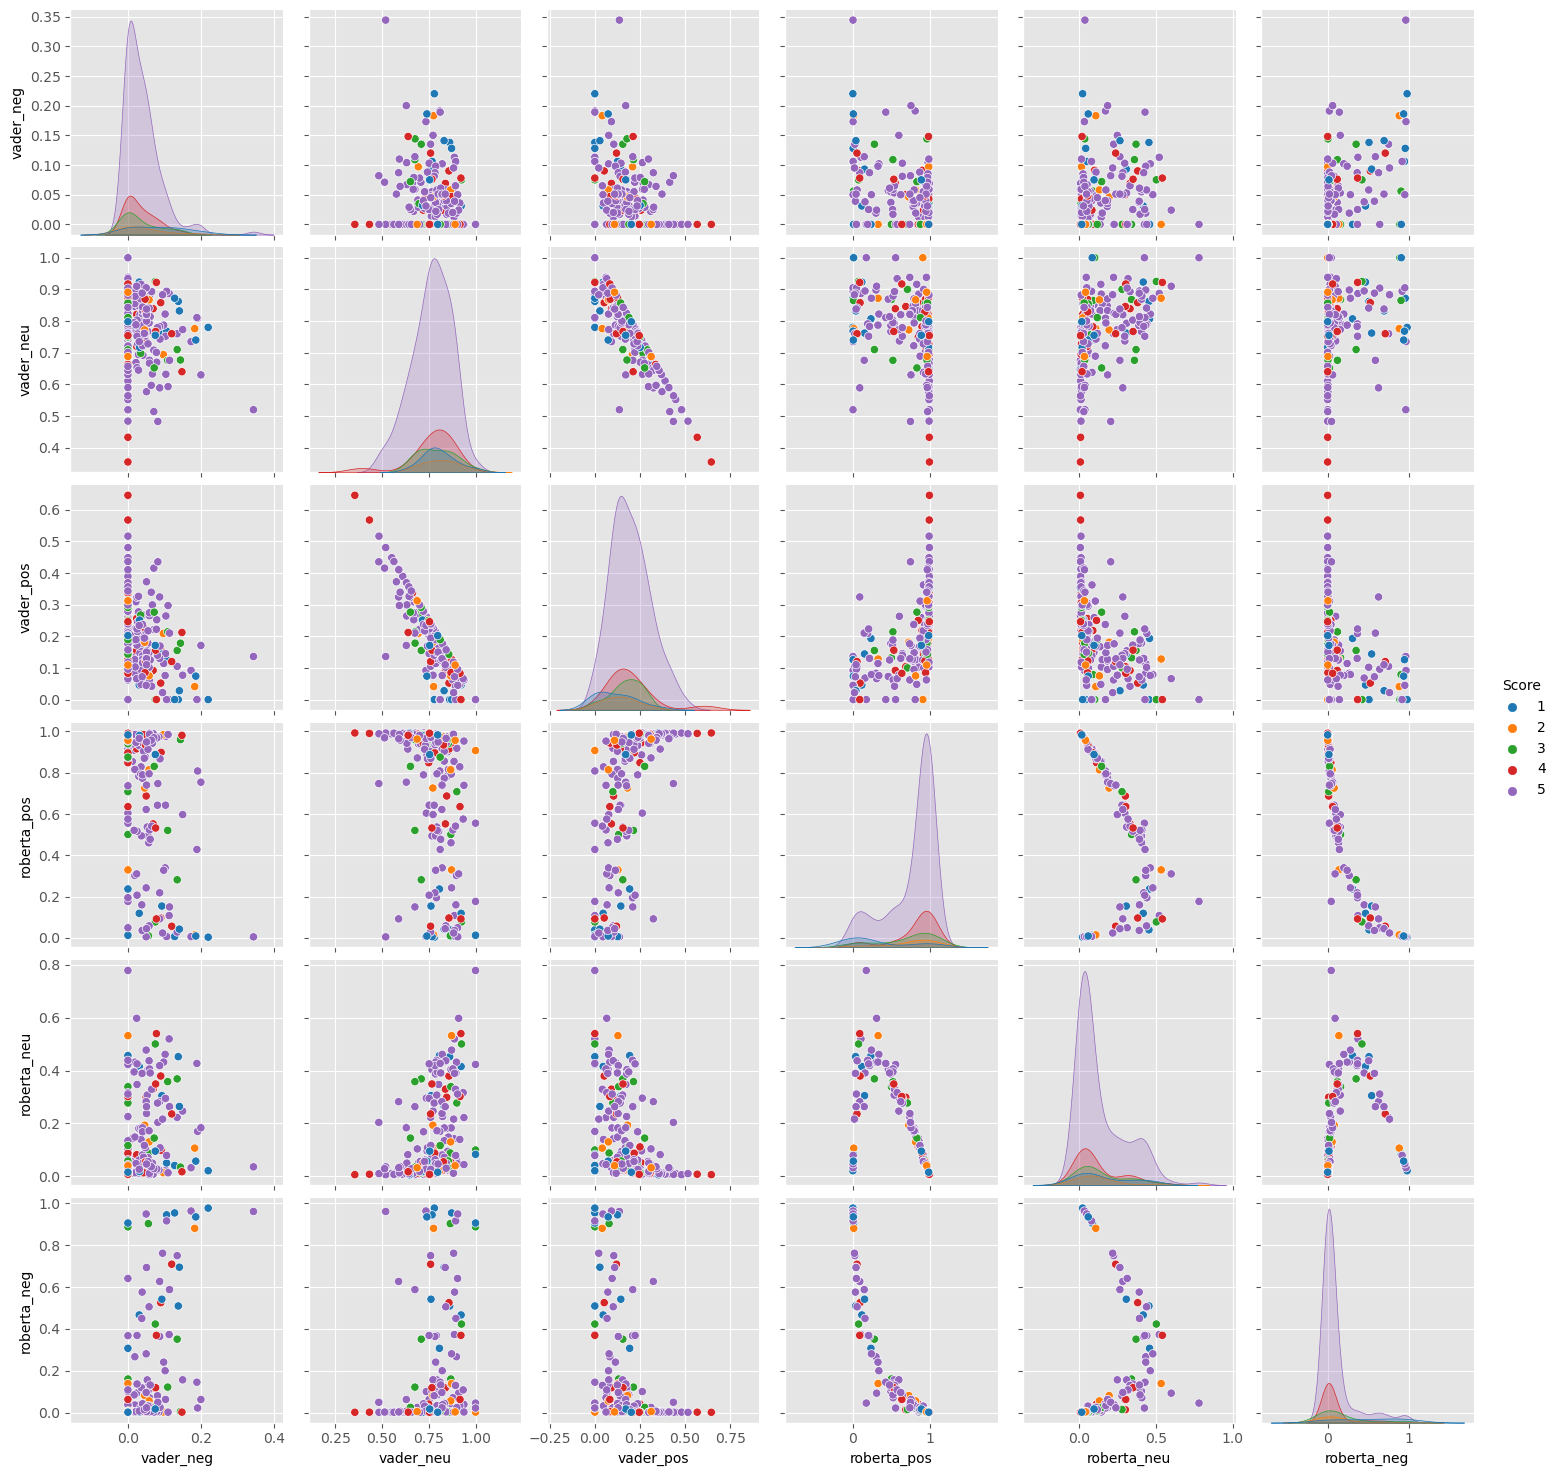

In [38]:
sns.pairplot(data=results_df,vars=['vader_neg','vader_neu','vader_pos',
                                 'roberta_pos','roberta_neu','roberta_neg'],
            hue='Score',palette='tab10')

plt.show()

# Reviewing the Examples


There might be positive 1 star reviews and negative 5 star reviews where the model might not be able to work properly. 

In [39]:
results_df.query('Score==1')\
.sort_values('roberta_pos',ascending=False)['Text'].values[0]

"These singles sell for $2.50 - $3.36 at the store for 1 box of 24 singles. I'm not sure why Amazon is selling it for $9.99 for a box of 24 singles.  Hazelnut coffee creamer is my favorite, but truly this is not a good buy."

In [40]:

results_df.query('Score==1')\
.sort_values('roberta_neg',ascending=False)['Text'].values[0]

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [42]:
#negative sentiment 5 star review. 
results_df.query('Score==5')\
.sort_values('roberta_neg',ascending=False)['Text'].values[0]

"My English Bulldog had skin allergies the summer we got him at age 3.  The vet recommended we wean him off the food his previous owner gave him (Iams Lamb and Rice) and onto a new kind.  This was the second one we tried, and it has been working ever since.  It's for dogs that need a limited diet who can be sensitive to additives and proteins commonly found in commercial dog food (like chicken or beef)."

## Transformers Pipeline 


In [43]:
from transformers import pipeline

sent_pipeline=pipeline("sentiment-analysis")


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

C:\Users\prana\anaconda3\lib\site-packages\huggingface_hub\file_download.py:123: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\prana\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Transformers built-in automatic sentiment analysis library which helps in direct sentiment analysis without any extra long codes. This method of sentiment analysis can also pe implemented. 

In [45]:
sent_pipeline("booooo")

[{'label': 'POSITIVE', 'score': 0.6336071491241455}]